# Pairs Trading with Copula Approach_Theory Part

## References
- Slides: Introduction to Copula-Based Pairs Trading Strategy. https://docs.google.com/presentation/d/19xUNdddCsdXg2KizcUMVvdjhTnA8Cuq293brXB8rSWM/edit#slide=id.p
- Copula for Pairs Trading: A Unified Overview of Common Strategies. https://hudsonthames.org/copula-for-pairs-trading-overview-of-common-strategies/
- Introduction to copulas (Part 1). https://medium.com/@financialnoob/introduction-to-copulas-part-1-2ccbc5373d2e
- 🌟Pairs Trading: Copulas VS Cointegration. https://www.quantconnect.com/learning/articles/investment-strategy-library/pairs-trading-copula-vs-cointegration
- Copula Strategy: Variations In The Mispricing Index Trading. https://docs.google.com/presentation/d/1FgEkCuiCh2Jg6aS5J-bYFoBDWUygEcN0GA5YSM52m_o/edit#slide=id.p1
- Pairs trading with Copulas. https://efmaefm.org/0efmameetings/EFMA%20ANNUAL%20MEETINGS/2014-Rome/papers/EFMA2014_0222_FullPaper.pdf
- The profitability of pairs trading strategies: distance, cointegration and copula methods. https://www.tandfonline.com/doi/abs/10.1080/14697688.2016.1164337?casa_token=i9PYPDpq4ssAAAAA%3A-Jft2sesf5R_peaiSI9JfiB890w_NBz_U24Z4-gcVpIkd-yX1b2hUac0SYMxSonmQFJIkwSlbYrboA&journalCode=rquf20


## Copula
- A good way to model **tail dependency**,part of non-linearity
- Means *Chains* or *Link* in Latin way.

### Mathmetical Concept
- Get data from two RV, denoted as $S_1$ and $S_2$. 
  - in finance field, we can think $S_1$ and $S_2$ as prices or returns
- Use <u>marginal cumulative density function</u> maps to *quantiles* $U_1$ and $U_2$: $P(U_1≤u_1, U_2≤u_2)=C(u_1,u_2)=\frac{𝛛^2C(u_1,u_2)}{𝛛u_2}$
  - This formula is used for log maximum likelihood fitting for copulas.
  - $U_1$ and $U_2$ are uniformed between 0 and 1.
  - <u>Conditional Proability</u>: used for **trading** mostly
    - $P(U_1≤u_1|U_2=u_2):=\frac{𝛛C(u_1,u_2)}{𝛛u_2}$
      - $P(U_1≤u_1|U_2=u_2)< 0.5$→Stock 1 is undervalued.
      - $P(U_1≤u_1|U_2=u_2)> 0.5$→Stock 1 is overvalued.
    - $P(U_2≤u_2|U_1=u_1):=\frac{𝛛C(u_1,u_2)}{𝛛u_1}$

## Application in Trading 
### Strategy1: Simple Threshold on Prices
- $Spread=h_1S_1-h_2S_2$
- Trading Signal: Usually, we set $c=0.5$ as threshold.
  - if $P(U_1≤u_1|U_2=u_2)<= c$ and $P(U_1≤u_1|U_1=u_1)>= 1-c$ → **Long** the spread. Namely, buy $S_1$, sell $S_2$.
    - $S_1$ undervalued, $S_2$ overvalued
  - if $P(U_2≤u_2|U_1=u_1)<= c$ and $P(U_1≤u_1|U_2=u_2)>= 1-c$ → **Short** the spread. Namely, buy $S_2$, sell $S_1$.
    - $S_2$ undervalued, $S_1$ overvalued
  - if <u>both</u> cdf cross $c$ → **Exit** the position
- Evaluation:
  - Disadvantages: 
    1. prices are non-stationary
    2. Some cases time series are difficult to fit
      - local aggregations 
      - asymmetry
    - Solutions: 
      - use returns to model instead of prices
  - Advantages:
    1. simple and easy to understand
    2. if we choose right pairs, there exists a robust performance

### Strategy2: Mispricing Index on Returns
- **Mispricing Index (MPI)**: conditional probability of returns
  - $MI_t^{X|Y}=P(R_t^X < r_t^X|R_t^Y < r_t^Y)$
  - $MI_t^{Y|X}=P(R_t^Y < r_t^Y|R_t^X < r_t^X)$
    - $r$: observed data
- **Flag: Cumulative MPI (CMPI)**
  - $FlagX^*(t)=FlagX*(t-1)+(MI_t^{X|Y}-0.5)$, $FlagX^*(0)=0$
  - $FlagY^*(t)=FlagY*(t-1)+(MI_t^{Y|X}-0.5)$, $FlagY^*(0)=0$
    - 0.5 represents the *average*
  - if there is an <u>exit position</u>, the real flag series $FlagX(t)$ and $FlagY(t)$ will be reset to 0.
- Trading Signal: under dollar neutral strategy
  1. Open Rules(OR logic)
    - $FlagX$ reaches $0.6$ → short $X$ and buy $Y$
      - StockX is overvalued
    - $FlagX$ reaches $-0.6$→ short $Y$ and buy $X$
      - StockX is undervalued
    - $FlagY$ reaches $0.6$ → short $Y$ and buy $X$
    - $FlagY$ reaches $-0.6$→ short $X$ and buy $Y$
  2. Exit Rules: No long mispricing (OR logic)
    - Close $FlagX$ if returns come to $0$ or $±2$, when trading based on X.
    - Close $FlagY$ if returns come to $0$ or $±2$, when trading based on Y.
  3. Reset Rule: Update the evaluation
    - when there is an exit position, reset flags to $0$.
- Evaluation:
  - Disadvantages:
    1. The series are highly model dependent, the results are different based on different copula model choosen.
      - Solution: use $AIC$ and $BIC$ statistics to select best fitting copula
        - $AIC=-2L(θ)+2k$
          - $k$: number of parameters
          - $L(θ)=\sum_{t=1}^T log_c(u_t, v_t;θ)$, maximum log-likelihood function 
        - $BIC=-2ln(θ)+kln(N)$
          - $N$: number of data points
    2. Not necessarily driven by mean-reverting.
    3. Sometimes the strategy trading is too sensitive for position changes.
- Improvement: Alternative Strategy Signals for MPI
  1. More Stable Method: 
    - Set open rules of trading signal to `AND` logic, instead of OR. 
    - Set the Exit rule to if `EITHER` flag series crosses with $0$.
    - DO NOT define the reset rule.
      - it is more stable even if in bearish markets
      - While, it generates *less returns* than coint or distance approach overall.
  2. Bollinger Bond Variation
    - Trading Threshold:
      - Overpriced when > $movingavg+std*k$(upper bound)
      - Underpriced when < $ movingavg- std*k$ (lower bound)
    - Trading Strategy:
      - Open:
        - Short: $X$ is overpriced OR $Y$ is underpriced
        - Long: $X$ is underpriced OR $Y$ is overpriced
      - Exit:
        - if EITHER flag series crosses with mean.
    - Evaluation:
      - Disadvantages: exit too frequent
      - Advantages:
        - use less copula method without model dependency
        - keep mean-reverting
        - self-adaptive


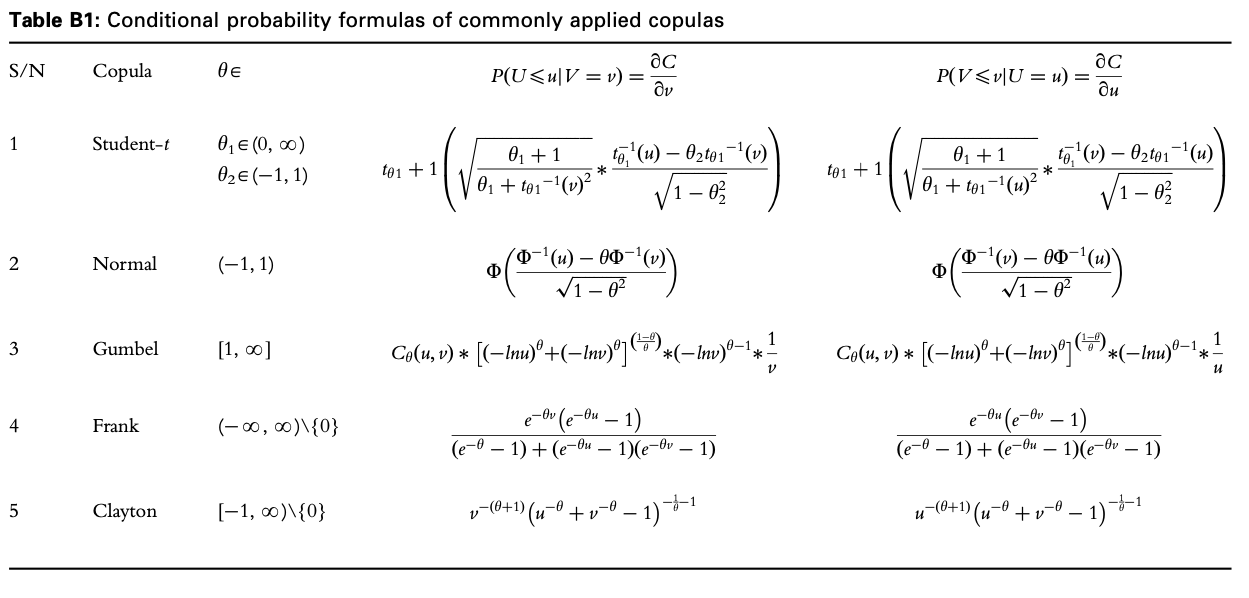